In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import os

In [86]:
path = '/Users/wasilengel/Desktop/School/Harris/AP2/PSet 2'
labels_path = os.path.join(path, 'IAEPv2_0_2015labels.csv')
numbers_path = os.path.join(path, 'IAEPv2_0_2015numeric.csv')

## 3

In [87]:
df_1 = pd.read_csv(labels_path)

In [88]:
pd.set_option('max_columns', None) # displays all columns
df_1.head()

,cname,cabr,ccode,year,formalconstit,writconstit,ineffect,cease,amend,amfrmlconv,amexec,amleg,amregprov,rat,ratfrmlconv,ratexec,ratleg,ratref,ratregprov,amyear,leg,legcham,lowcham,upcham,chamother,uppub,upselect,upexec,lowpub,lowselect,lowexec,proppub,propexec,propleg,execveto,legveto,removeexec,removeleg,execforce,exectax,execbudget,court,remove,life,courtexec,courtleg,centralbank,dirterm,bankpol,elecexec,elecleg,elecrefer,exleg,execindep,execappoint,milpm,milpres,milnone,legpm,legpres,legnone,callpm,callpres,callnone,schedexec,schedleg,schedboth,schedna,lpartynom,lprimary,lselfnom,lpetition,lexecnom,epartynom,eprimary,eselfnom,epetition,banned,banethnic,banrelig,bansys,banall,stateparty,suffage,suffgen,suffprop,suffparty,suffethrel,suffcrim,suffreg,suffother,election,electexec,electleg,electboth,legcompet,execcompet,electboy,electprot,postprot,legelig,execelig,estabcon_year,execpocketveto,id,estabcon,ceasedate,legelecdate,exelecdate,rattreaty,appelec,whoby,govstruct,regstruct,bankdir,electtime,elecperiod,reservedseat,reservedby,lelecsystem,eelect,eelectrules,parties,electpost,electdelay,protestpart,lastamend,timeineffect,constage,milother,legother,callother,gwno
0,United States of America,USA,2,1960,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,N/A - no postponed/canceled election,63.06,63.06,1787.0,Yes,2 1960,17sep1787,.c,08nov1960,08nov1960,Both chambers' approval necessary,Appointed,Legislature,Federal system,Autonomous decision,Executive app. with leg. cons.,"Yes, exact periods",One day,3,N/A - no reserved seats,Plurality (FPP),Indirect public vote,Majority rule,Two,None of the above,N/A - no election protest,N/A - no election protest,0.0,0.0,173,0,0,0,2.0
1,United States of America,USA,2,1961,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,N/A - no election this year,N/A - no election this year,N/A - no election this year,Missing information,Missing information,N/A - no election this year,N/A - no election this year,N/A - no election this year,.o,.o,1787.0,Yes,2 1961,17sep1787,.c,.o,.a,Both chambers' approval necessary,Appointed,Legislature,Federal system,Autonomous decision,Executive app. with leg. cons.,"Yes, exact periods",One day,3,N/A - no reserved seats,Plurality (FPP),Indirect public vote,Majority rule,Two,N/A - no election this year,N/A - no election this year,N/A - no election this year,1.0,1.0,174,0,0,0,2.0
2,United States of America,USA,2,1962,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,N/A - no postponed/canceled election,47.27,.a,1787.0,Yes,2 1962,17sep1787,.c,06nov1962,.a,Both chambers' approval necessary,Appointed,Legislature,Federal system,Autonomous decision,Executive app. with leg. cons.,"Yes, exact periods",One day,3,N/A - no reserved seats,Plurality (FPP),Indirect public vote,Majority rule,Two,None of the above,N/A - no election protest,N/A - no election protest,2.0,2.0,175,0,0,0,2.0
3,United States of America,USA,2,1963,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes

In [89]:
# df_2 = pd.read_csv(numbers_path)

In [90]:
# pd.set_option('max_columns', None) # displays all columns
# df_2.head()
# Since I don't want to go through the code notebook, I'll use the classified version of the df, which I named df_1

In [91]:
# a 

In [92]:
# Find unique values for lelecsystem, which classifies electoral systems

In [93]:
df_1["lelecsystem"].unique()

array(['Plurality (FPP)', 'Majority', 'Missing information',
       'N/A - no elected legislature', 'N/A - no legislature',
       'Mixed systems', 'Proportional representation'], dtype=object)

In [94]:
# Renaming column values according to instructions 

In [95]:
df_1["lelecsystem"] = df_1['lelecsystem'].replace({'Plurality (FPP)': 'plurality', 'Majority': 'majority', 'Proportional representation': 'proportional representation', 'Mixed systems': 'mixed', 'N/A - no legislature': 'missing', 'N/A - no elected legislature': 'missing', 'Missing information': 'missing'})

In [96]:
df_1["lelecsystem"].unique()

array(['plurality', 'majority', 'missing', 'mixed',
       'proportional representation'], dtype=object)

In [99]:
# Reducing df_1 to essential columns needed for this assignment: df_1_red

In [100]:
df_1_red = df_1[["cabr", "cname", "year", "lelecsystem"]]
df_1_red.head()

,cabr,cname,year,lelecsystem
0,USA,United States of America,1960,plurality
1,USA,United States of America,1961,plurality
2,USA,United States of America,1962,plurality
3,USA,United States of America,1963,plurality
4,USA,United States of America,1964,plurality


In [101]:
df_1_red_2011 = df_1_red[df_1_red["year"] == 2011]
# df_1_red_2011["year"].unique() # check that it works -> Yes, 2011 is the unique value
df_1_red_2011.head() # 163 rows that means we have data for 163 countries here

,cabr,cname,year,lelecsystem
51,USA,United States of America,2011,plurality
104,CAN,Canada,2011,majority
157,CUB,Cuba,2011,majority
210,HAI,Haiti,2011,mixed
263,DOM,Dominican Republic,2011,proportional representation


In [102]:
# Plot world map showing the varying electoral systems across the world

In [ ]:
# Prepare

In [103]:
# First, merge geopandas data with our data: 'naturalearth_lowres' is geopandas datasets so I can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Reduce size to essential columns
world = world[["iso_a3", "name", "geometry"]]
world # 177 rows that means we have data for 14 countries more here (will be filtered out once I merge)
# Rename the columns in world dataframe so that I can merge
world.columns=['iso_a3', 'cname', 'geometry']
merged = pd.merge(world, df_1_red_2011, on='cname')
merged

,iso_a3,cname,geometry,cabr,year,lelecsystem
0,TZA,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TAZ,2011,plurality
1,CAN,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,2011,majority
2,USA,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,2011,plurality
3,KAZ,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KZK,2011,mixed
4,UZB,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",UZB,2011,majority
...,...,...,...,...,...,...
142,UGA,Uganda,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",UGA,2011,plurality
143,RWA,Rwanda,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",RWA,2011,proportional representation
144,MKD,Macedonia,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MAC,2011,mixed
145,MNE,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNG,2011,proportional representation


In [79]:
# Plot 

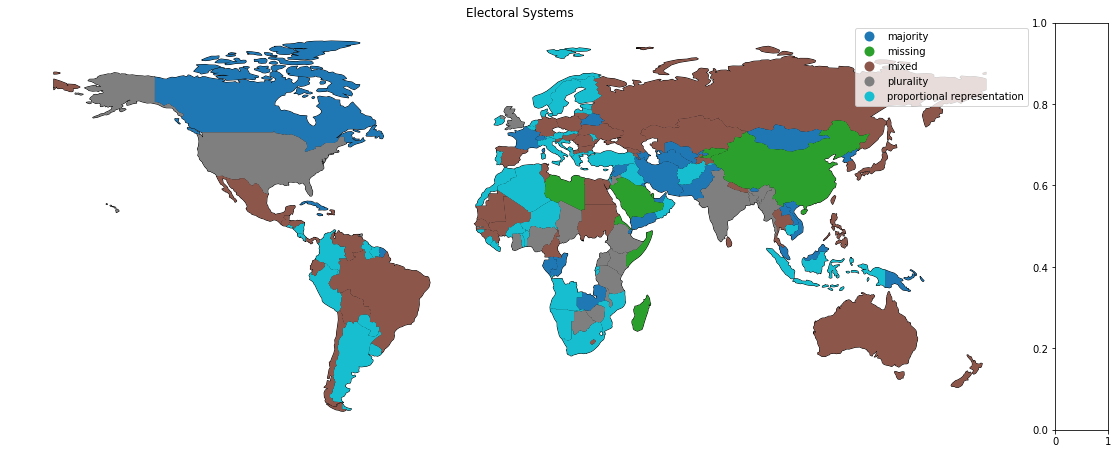

In [104]:
fig, ax = plt.subplots(figsize=(20,20)) # we want the image to be square (x = y) 
merged.plot(ax=ax, color='white', edgecolor='black')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1) # controls legend 
ax = merged.plot(ax=ax, column='lelecsystem', legend=True, cax=cax) 
ax.axis('off')
ax.set_title('Electoral Systems');

## Using Police Data

In [54]:
df_police  = geopandas.read_file(police_path)

In [55]:
df_streets = geopandas.read_file(streets_path)

In [56]:
df_police.head()

,beat,beat_num,district,sector,geometry
0,1,1713,17,1,"POLYGON ((-87.70473 41.97577, -87.70472 41.975..."
1,0,3100,31,0,"POLYGON ((-87.83365 41.97535, -87.83366 41.974..."
2,5,1651,16,5,"POLYGON ((-87.90684 41.97656, -87.91070 41.975..."
3,1,1914,19,1,"POLYGON ((-87.64492 41.96973, -87.64431 41.969..."
4,1,1915,19,1,"POLYGON ((-87.63724 41.96599, -87.63644 41.965..."


In [57]:
df_streets.head()

,OBJECTID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,TRANS_,TRANS_ID,SOURCE_ID,OLD_TRANS_,...,R_ATOM,L_COMAREA,R_COMAREA,L_SECT_NAM,R_SECT_NAM,F_CROSS,T_CROSS,STREETNAME,SHAPE_LEN,geometry
0,1,16580,16726,0,0,519.319450,52842,115733,15741,118419,...,9746,28,28,NE193914,NE193914,1412|S|||,1500|S|||,1225,519.319426,"LINESTRING (1163266.661 1893233.567, 1163267.7..."
1,2,18237,18363,0,0,432.446967,45410,149406,49489,160784,...,10550,33,33,NW273914,NW273914,2|E|STATE ST|ER|,2|E|26TH|ST|,1649,432.446930,"LINESTRING (1176732.996 1887540.559, 1176756.6..."
2,3,12874,12840,0,0,80.979391,23831,149515,49599,152590,...,7540,8,8,NE103914,NE103914,0|E|GRAND|AVE|,0|E|GRAND|AVE|,519,80.979352,"LINESTRING (1180162.811 1904023.205, 1180172.4..."
3,4,19623,19624,0,0,106.027908,26753,115957,15969,103718,...,11096,34,34,NE333914,NE333914,3501|S|LA SALLE|ST|,3459|S|IB DAN RYAN|LOCAL|,1827,106.027936,"LINESTRING (1175977.016 1881779.109, 1175948.0..."
4,5,15832,15842,0,0,38.351781,28576,124097,24129,127124,...,9398,26,26,SW153913,SW153913,800|S|||,800|S|||,1425,38.351781,"LINESTRING (1147178.215 1896059.471, 1147179.4..."


In [58]:
df_police.crs
# 4326 references the whole world

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
# coordinate reference system 
df_streets.crs
# 3435 references IL only, so we need to standardize! 

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Illinois - SPCS - E
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

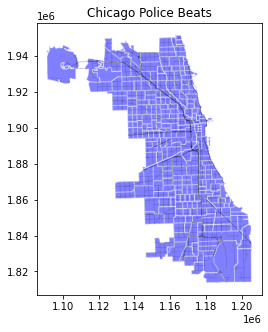

In [70]:
fig, ax = plt.subplots(figsize=(5,5))

df_police.to_crs(epsg=3435).plot(ax=ax, color='blue', alpha=0.5, edgecolor='white', label='Police Beats')
df_streets.to_crs(epsg=3435).plot(ax=ax, color='black', alpha=0.2, linewidth=0.5)
# function .to_crs standardizes "world" and "IL" using "IL" (see 3435)

ax.axis('on')
ax.set_title('Chicago Police Beats');

## Choropleth

In [69]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,world_pop_share
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000125
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.007307
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.000082
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.004825
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.044240


In [62]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

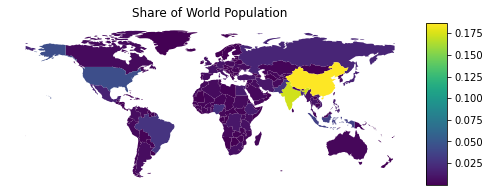

In [63]:
#https://geopandas.org/mapping.html
fig, ax = plt.subplots(figsize=(8,8))

world['world_pop_share'] = world['pop_est'] / sum(world['pop_est'])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1) # controls legend 
    
ax = world[world.continent != 'Antarctica'].plot(ax=ax, column='world_pop_share', legend=True, cax=cax) 
# cax=cax is important for that it actually passes legend in 
# taken Antartctice out because it gets so distorted

ax.axis('off')
ax.set_title('Share of World Population');